In [75]:
import tensorflow as tf

In [76]:
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


**Creating Tensors**

Below is an example of how to create some different tensors.

You simply define the value of the tensor and the datatype and you are good to go! It's worth mentioning that usually we deal with tensors of numeric data, it is quite rare to see string tensors.

For a full list of datatypes please refer to the following guide.

In [77]:
strng= tf.Variable("this is a string", tf.string)
strng

<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'this is a string'>

In [78]:
Intgr= tf.Variable(444, tf.int16)
Intgr

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=444>

In [79]:
floating = tf.Variable(3.567, tf.float64)
floating

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.567>

## Rank/Degree of Tensors

In [80]:
rank1_tensor = tf.Variable(["Test"], tf.string) # 1 degree/rank: bec have single list.
rank2_tensor = tf.Variable([["test", "ok"], ["test", "yes"]], tf.string)# 2 degree/rank: bec have list within list.

In [81]:
rank1_tensor
rank2_tensor

<tf.Variable 'Variable:0' shape=(2, 2) dtype=string, numpy=
array([[b'test', b'ok'],
       [b'test', b'yes']], dtype=object)>

In [82]:
tf.rank(rank1_tensor) #check, numpy=1

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [83]:
tf.rank(rank2_tensor)   #check, numpy=2

<tf.Tensor: shape=(), dtype=int32, numpy=2>

## Shape:

In [84]:
rank2_tensor.shape

TensorShape([2, 2])

Two lists and each one has 2 elements.


# Changing Shape
The **number of elements of a tensor is the product of the sizes of all its shapes**. There are often many shapes that have the same number of elements, making it convient to be able to change the shape of a tensor.

In [85]:
tensor1 = tf.ones([1,2,3])  # tf.ones() creates a shape [1,2,3] tensor full of ones
tensor2 = tf.reshape(tensor1, [2,3,1])  # reshape existing data to shape [2,3,1]
tensor3 = tf.reshape(tensor2, [3, -1])  # -1 tells the tensor to calculate the size of the dimension in that place
                                        # this will reshape the tensor to [3,2]
                                                                             
# The numer of elements in the reshaped tensor MUST match the number in the original

In [86]:
print(tensor1) # shape(identical matrices, rows, columns)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)


In [87]:
print(tensor2) # reshaping 

tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)


In [88]:
 tensor3 = tf.reshape(tensor2, [3, -1])
 print(tensor3)                           # -1 tells the tensor to calculate the size of the dimension in that place
                                        # this will reshape the tensor to [3,2] .

                                        

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


In [89]:
 tensor4 = tf.reshape(tensor2, [2,-1]) #(1,2)
print(tensor4)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)


Concept of -1 is not clear.

## Slicing Tensors

In [90]:
# Creating a 2D tensor
matrix = [[1,2,3,4,5],
          [6,7,8,9,10],
          [11,12,13,14,15],
          [16,17,18,19,20]]
tensor = tf.Variable(matrix, dtype=tf.int32) 
print(tf.rank(tensor))
print(tensor.shape)

tf.Tensor(2, shape=(), dtype=int32)
(4, 5)


In [91]:
 #Now lets select some different rows and columns from our tensor

three = tensor[0,2]  # selects the 3rd element from the 1st row
print(three)  # -> 3

tf.Tensor(3, shape=(), dtype=int32)



# Types of Tensors


Before we go to far, I will mention that there are diffent types of tensors. These are the most used and we will talk more in depth about each as they are used.

Variable
Constant
Placeholder
SparseTensor
**With the execption of Variable all these tensors are immuttable,** meaning their value may not change during execution.

For now, it is enough to understand that we use the Variable tensor when we want to potentially change the value of our tensor.


# Sources

Most of the information is taken direclty from the TensorFlow website which can be found below.

https://www.tensorflow.org/guide/tensor

In [92]:
t=tf.zeros([2,2,2,2])
t

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [93]:
z=tf.reshape(t,[16])# create array of single row, 2*2*2*2=16
z

<tf.Tensor: shape=(16,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>

In [94]:
e=tf.reshape(t,[8, -1]) # this method will create as much rows as mentioned in the first element.
e

<tf.Tensor: shape=(8, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

#TensorFlow Core Learning Algorithms

The algorithms we will focus on include:


  Linear Regression

  Classification
  
  Clustering
  
  Hidden Markov Models

It is worth noting that there are many tools within TensorFlow that could be used to solve the problems we will see below. I have chosen the tools that I belive give the most variety and are easiest to use.


#Linear Regression
Linear regression is one of the most basic forms of machine learning and is used to predict numeric values.

In this tutorial we will use a linear model to predict the survival rate of passangers from the titanic dataset.

This section is based on the following documentation: https://www.tensorflow.org/tutorials/estimator/linear

###How it Works

Linear regression follows a very simple concept. **If data points are related linearly, we can generate a line of best fit for these points and use it to predict future values.**

Let's take an example of a data set with one feature and one label.



(0.0, 6.0, 0.0, 20.0)

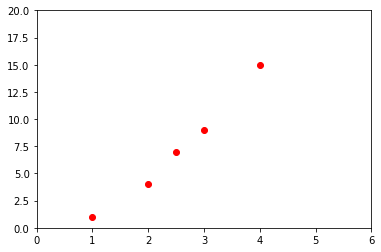

In [95]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro') # ro: plot with red circles.
plt.axis([0, 6, 0, 20])

We can see that this data has a linear coorespondence. When the x value increases, so does the y. Because of this relation we can create a line of best fit for this dataset. In this example our line will only use one input variable, as we are working with two dimensions. In larger datasets with more features our line will have more features and inputs.

"Line of best fit refers to a line through a scatter plot of data points that best expresses the relationship between those points." (https://www.investopedia.com/terms/l/line-of-best-fit.asp)

Here's a refresher on the equation of a line in 2D.

y=mx+b 

Here's an example of a line of best fit for this graph.

In [96]:
!pip install -q sklearn

In [97]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

The dataset we will be focusing on here is the titanic dataset. It has tons of information about each passanger on the ship. Our first step is always to understand the data and explore it. So, let's do that!



In [98]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [99]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


And if we want a more statistical analysis of our data we can use the .describe() method.

In [100]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [101]:
dftrain.shape

(627, 9)

So have have 627 entries and 9 features, nice!

Now let's have a look at our survival information.

In [102]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

And now because visuals are always valuable let's generate a few graphs of the data.

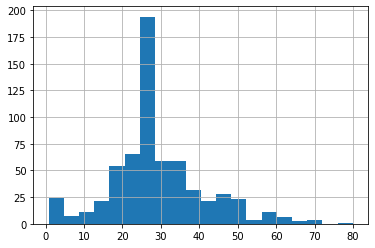

In [103]:
dftrain.age.hist(bins=20)

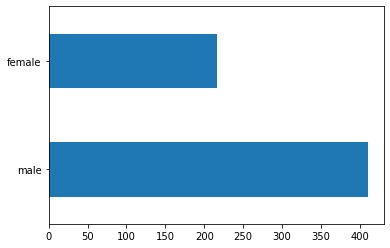

In [104]:
dftrain.sex.value_counts().plot(kind='barh') 

In above graph, total number of males and females are represented in graph by using value_count() methods.

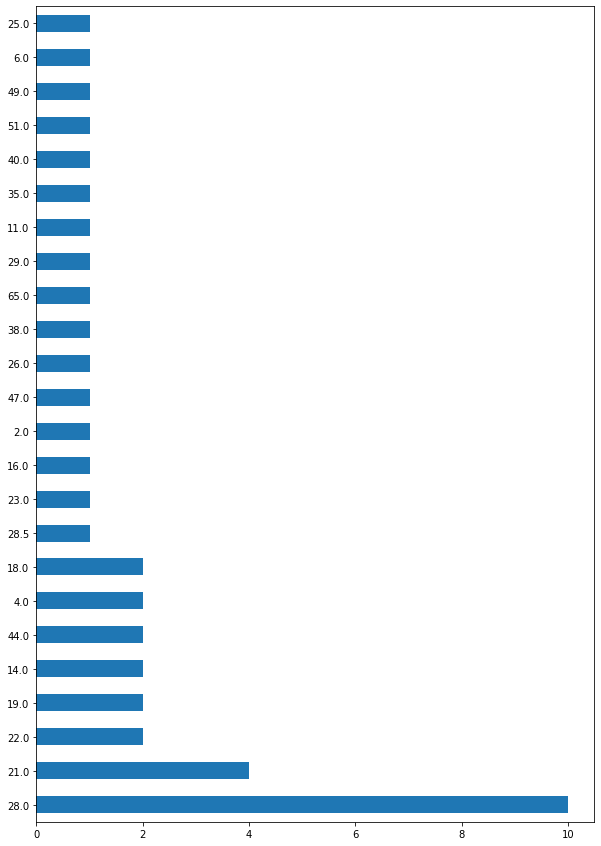

In [105]:
dftrain.age[::15].value_counts().plot(kind='barh', figsize= (10,15)) 

Text(0.5, 0, '% survive')

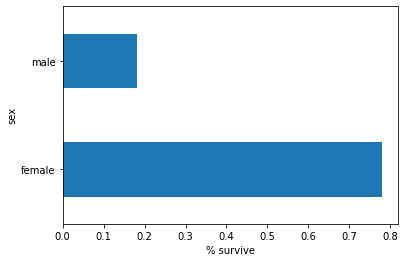

In [106]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

Text(0.5, 0, '% fare')

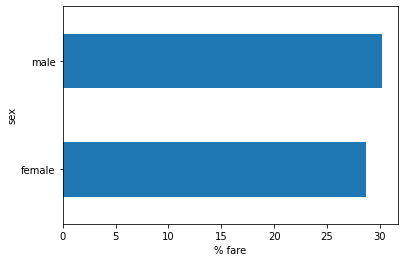

In [107]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').age.mean().plot(kind='barh').set_xlabel('% fare')

Read this for concatenation:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

Read for .groupby().mean
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html


After analyzing this information, we should notice the following:

Most passengers are in their 20's or 30's

Most passengers are male

Most passengers are in "Third" class

Females have a much higher chance of survival

#Training vs Testing Data
You may have noticed that we loaded two different datasets above. This is because when we train models, we need two sets of data: training and testing.

The training data is what we feed to the model so that it can develop and learn. It is usually a much larger size than the testing data.

The testing data is what we use to evaulate the model and see how well it is performing. We must use a seperate set of data that the model has not been trained on to evaluate it. Can you think of why this is?

Well, the point of our model is to be able to make predictions on NEW data, data that we have never seen before. **If we simply test the model on the data that it has already seen we cannot measure its accuracy accuratly**. We can't be sure that the model hasn't simply memorized our training data. This is why we need our testing and training data to be seperate.

#Feature Columns
In our dataset we have two different kinds of information: **Categorical and Numeric**

Our categorical data is anything that is not numeric! For example, the sex column does not use numbers, it uses the words "male" and "female".

Before we continue and create/train a model we must convet our categorical data into numeric data. We can do this by encoding each category with an integer (ex. male = 1, female = 2).

Fortunately for us TensorFlow has some tools to help!

In [108]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

Let's break this code down a little bit...

Essentially what we are doing here is creating a list of features that are used in our dataset.

The cryptic lines of code inside the append() create an object that our model can use to map string values like "male" and "female" to integers. This allows us to avoid manually having to encode our dataframes.

And here is some relevant documentation

https://www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_vocabulary_list?version=stable




Estimators use a system called feature columns **to describe how the model should interpret each of the raw input features**. An Estimator **expects a vector of numeric inputs**, and feature column describe how the model should convert each feature.
**bold text**


#The Training Process

Training:  how input data is fed to our model.

For this specific model data is going to be streamed into it in small batches of 32. This means we will not feed the entire dataset to our model at once, but simply small batches of entries. We will feed these batches to our model multiple times according to the number of epochs.

An epoch is simply one stream of our entire dataset. The number of epochs we define is the amount of times our model will see the entire dataset. We use multiple epochs in hope that after seeing the same data multiple times the model will better determine how to estimate it.

Ex. if we have 10 ephocs, our model will see the same dataset 10 times.

Since we need to feed our data in batches and multiple times, we need to create something called an input function. The input function simply defines how our dataset will be converted into batches at each epoch.

#Input Function

The TensorFlow model we are going to use requires that the data we pass it comes in as a tf.data.Dataset object. This means we must create a input function that can **convert our current pandas dataframe into that object.**

 TensorFlow documentation (https://www.tensorflow.org/tutorials/estimator/linear). 

---------------------------------------------------------------------
#tf.data.Dataset:

The tf.data.Dataset API supports writing descriptive and efficient input pipelines. Dataset usage follows a common pattern:

Create a source dataset from your input data.
Apply dataset transformations to preprocess the data.
Iterate over the dataset and process the elements.

Iteration happens in a streaming fashion, so the full dataset does not need to fit into memory. Streaming means, it made multile blocks of whole data and then feed the model subsequently.

from_tensor_slices:
Creates a Dataset whose elements are slices(parts, elements) of the given tensors. Or, it will show every element enclosed in colun seperately.



In [109]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)


In [110]:
#Example #1 :
#In this example we can see that by using tf.data.Dataset.from_tensor_slices() method, we are able to get the slices of list or array.


# import tensorflow 
import tensorflow as tf 
  
# using tf.data.Dataset.from_tensor_slices() method 
gfg = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5]) 
  
for ele in gfg: 
    print(ele.numpy()) 

1
2
3
4
5


In [111]:
#Example #2 :


# import tensorflow 
import tensorflow as tf 
  
# using tf.data.Dataset.from_tensor_slices() method 
gfg = tf.data.Dataset.from_tensor_slices([[5, 10], [3, 6]]) 
  
for ele in gfg: 
    print(ele.numpy()) 

[ 5 10]
[3 6]


In [112]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns) # We create a linear estimtor by passing the feature columns we created earlier

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpn9nxrmyf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [113]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()  # clears consoke output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model
print(result)

0.7689394
{'accuracy': 0.7689394, 'accuracy_baseline': 0.625, 'auc': 0.8368534, 'auc_precision_recall': 0.78623074, 'average_loss': 0.4860067, 'label/mean': 0.375, 'loss': 0.477642, 'precision': 0.72619045, 'prediction/mean': 0.31556195, 'recall': 0.61616164, 'global_step': 200}


In [114]:
result=list(linear_est.predict(eval_input_fn))
print(result)

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpn9nxrmyf/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[{'logits': array([-2.9338822], dtype=float32), 'logistic': array([0.05050382], dtype=float32), 'probabilities': array([0.9494962 , 0.05050384], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-1.461403], dtype=float32), 'logistic': array([0.18825284], dtype=float32), 'probabilities': array([0.81174713, 0.18825282], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([0.09635223], dtype=float32), 'logistic': array([0.5240694], dtype=float32), 'probabilities': array([0.47593

In [115]:
print(result[0])

{'logits': array([-2.9338822], dtype=float32), 'logistic': array([0.05050382], dtype=float32), 'probabilities': array([0.9494962 , 0.05050384], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}


In [116]:
print(result[0]["probabilities"])

[0.9494962  0.05050384]


In [117]:
print(result[0]["probabilities"][1])# accessing the percentage of non-servival of first result.

0.05050384


In [118]:
print(dfeval.iloc[0]) #getting detail of first person 

sex                          male
age                            35
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object


In [119]:
print(result[0]["probabilities"][1])
print(dfeval.iloc[1])


0.05050384
sex                          male
age                            54
n_siblings_spouses              0
parch                           0
fare                      51.8625
class                       First
deck                            E
embark_town           Southampton
alone                           y
Name: 1, dtype: object


INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpn9nxrmyf/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[Text(0.5, 1.0, 'y_eval')]

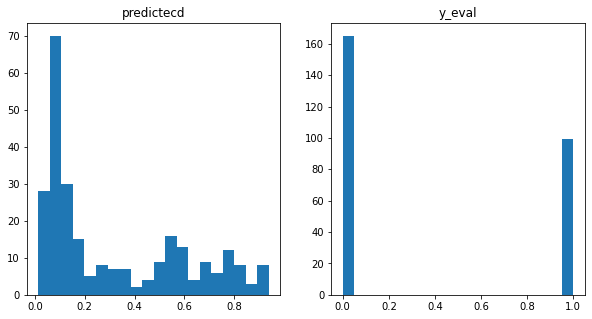

In [120]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

figure, (plot1, plot2)= plt.subplots(nrows=1, ncols=2, figsize=(10,5))
plot1.hist(probs, bins=20)
plot2.hist(y_eval, bins=20)
plot1.set(title="predictecd")
plot2.set(title="y_eval")

#Classification

In [121]:
def y(value):
  print(value)

x= lambda:y(10)

print(x())

10
None


In [122]:
for k in dftrain.keys(): # this method will give all of the column names.
  print(k)

sex
age
n_siblings_spouses
parch
fare
class
deck
embark_town
alone


#Deep Neural Network:

In [123]:

from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf

import pandas as pd

In [124]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']
# Lets define some constants to help us later on

In [125]:
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)
# Here we use keras (a module inside of TensorFlow) to grab our datasets and read them into a pandas dataframe

In [126]:
tr = pd.read_csv(train_path, names=CSV_COLUMN_NAMES)
tr

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,120.0,4.0,setosa,versicolor,virginica
1,6.4,2.8,5.6,2.2,2
2,5.0,2.3,3.3,1.0,1
3,4.9,2.5,4.5,1.7,2
4,4.9,3.1,1.5,0.1,0
...,...,...,...,...,...
116,5.5,2.6,4.4,1.2,1
117,5.7,3.0,4.2,1.2,1
118,4.4,2.9,1.4,0.2,0
119,4.8,3.0,1.4,0.1,0


In [127]:
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head() # the species column is now gone

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [128]:
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)


In [129]:
# Feature columns describe how to use the input.
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [130]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[30, 10],
    # The model must choose between 3 classes.
    n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpxvx6j7x8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [131]:
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=5000)
#input_fn=lambda: input_fn...: This will get dataset.batch or part of data from input function.
# that data is now being given to train function to train the model which is defined in "classifier" constant.
# 5000 steps menas to repeat this step 5000 times.
# We include a lambda to avoid creating an inner function previously

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpxvx6j7x8/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 1.1824696, step = 0
INFO:tensorflow:global_step/sec: 444.349
INFO:tensorflow:loss = 0.92457515, step = 100 (0.227 sec)
INFO:tensorflow:global_step/sec: 613.296
INFO:tensorflow:loss = 0.85048616, step = 200 (0.166 sec)
INFO:tensorflow:global_step/sec: 593.037
INFO:tensorflow:loss = 0.8197512, step = 300 (0.168 sec)
INFO:tensorflow:global_step/sec: 600.166
INFO:tensorflow:loss = 0.7713571, step = 400 (0.166 sec)
INFO:tensorflow:global_step/sec: 610.904
INFO:tensorflow:loss = 0.74697065, step = 500 (0.164 sec)
INF

In [132]:
#lambda is one line function, it performs tasks whatever after the colon is.

x = lambda : print("hi")
x()

hi


In [133]:
x = lambda a : a + 10 # here a is the argument of x or of lambda. Any variable on left side of column will be considered as column.
print(x(5))

15


In [134]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False)) #lambda is one line function, it performs tasks whatever after the colon is.
#.evaluate will evaluate the model by using test data. In this, it will find that how much model is accurate.
print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-03-10T04:20:59Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxvx6j7x8/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.20847s
INFO:tensorflow:Finished evaluation at 2021-03-10-04:21:00
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.8666667, average_loss = 0.4645402, global_step = 5000, loss = 0.4645402
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmpxvx6j7x8/model.ckpt-5000

Test set accuracy: 0.867



In [135]:
valid = True
while valid:
  x=5
  y=input(x)
  if not y.isdigit() : valid= False
  print(y)

5j
j


In [136]:
# Feature columns describe how to use the input.
my_feature_columns = []
z ={"z":2,"c":4,"d":5,"f":5,"r":3,"g":3}
for key in z.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='z', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='c', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='d', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='f', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='r', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='g', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [137]:
for x, y in zip(range(2,4), range(4,6)):

	print(x*y)


8
15


In [157]:
def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
  valid = True
  while valid: 
    val = input(feature + ": ")
    if not val.isdigit(): valid = False

  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))

print(f"predictions are {predictions}")
for pred_dict in predictions:
  
  print(f"predict taker is {pred_dict}")
  # check o/p of above print, it is showing class many other things along with the array of class_ids and probability. Now, class_ids 
  #will show the probability ONLY of that category (name of flowers in specie) of feature "specie" which is most suitable. 
  #E.g, 'class_ids': array([0/1/2]), within array it could be any value among these three because there are three n_classes which are defined 
  #on the basis of total categories within specie column.

  class_id = pred_dict['class_ids'][0]
  #As there is only one value in an array of class_id which is at position [0], Therefore ['class_id'][0].
  print(f"class id is {class_id}")
  
  probability = pred_dict['probabilities'][class_id]
  print(f"probability is {probability}")
  # now class_id value will be any from 0-2 therefore we will get the percentage of probability of that category by using the value of 
  #class_id which is dependent upon class_ids.

  print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))
  #here, value of class_id will also be used to get the name of that category which is most probable.

Please type numeric values as prompted.
SepalLength: 6.9
SepalWidth: 3.4
PetalLength: 5.8
PetalWidth: 2.8
predictions are <generator object Estimator.predict at 0x7ff0185eb250>
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxvx6j7x8/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
predict taker is {'logits': array([-0.4705813,  3.0165164,  3.972051 ], dtype=float32), 'probabilities': array([0.00842536, 0.27543283, 0.7161418 ], dtype=float32), 'class_ids': array([2]), 'classes': array([b'2'], dtype=object), 'all_class_ids': array([0, 1, 2], dtype=int32), 'all_classes': array([b'0', b'1', b'2'], dtype=object)}
class id is 2
probability is 0.7161418199539185
Prediction is "Virginica" (71.6%)
